<h2 align="center">Room Occupancy Detection Using Sensor Data</h2>

<img src="https://i.imgur.com/cEEtXzX.png" width="560" height="480"></img>

### Task 1: Introduction and Importing Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import yellowbrick as yb

warnings.simplefilter('ignore')

### Task 2: Anscombe's Quartet

***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [2]:
#data

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


In [3]:
# verify the summary statistics
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

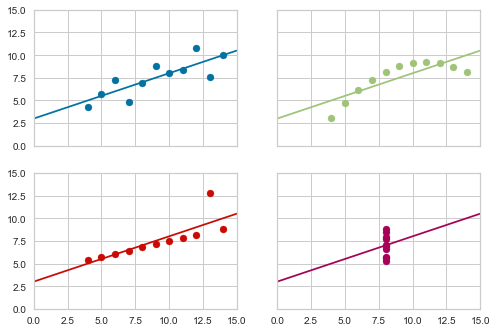

In [4]:
#visualize
g = yb.anscombe()
plt.show()

<h2 align=center> Feature Analysis </h2>

Components:
1. `Define` a bounded, high dimensional feature space that can be effectively modeled.
2. `Transform` and manipulate the space to make modeling eaier.
3. `Extract` a feature representation of each instance in the space.

### Task 3: Load the Classification Data


In [5]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')
data.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
# Specify the features of interest
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

In [7]:
# Extract the instances and target
X = data[features]
y = data.occupancy

### Task 4: Feature Analysis - Scatter Plot
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

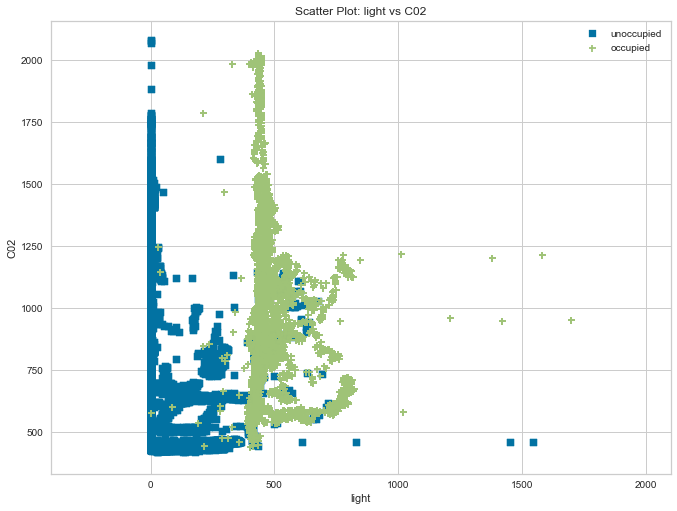

<AxesSubplot:title={'center':'Scatter Plot: light vs C02'}, xlabel='light', ylabel='C02'>

In [8]:
from yellowbrick.contrib.scatter import ScatterVisualizer

visualizer = ScatterVisualizer(x="light", y="C02", classes=classes, size=(800, 600))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

### Task 5: Feature Analysis - RadViz
***
RadViz is a non-linear multi-dimensional visualization technique that can display data defined by three or more variables in a 2-dimensional projection. The visualized variables are presented as anchor points equally spaced around the perimeter of a unit circle. Data instances are shown as points inside the circle. Its like, each point is held in place with springs that are attached at the other end to the variable anchors. The stiffness of each spring is proportional to the value of the corresponding variable and the point ends up at the position where the spring forces are in equilibrium.
***

In [9]:
from yellowbrick.features.radviz import RadViz

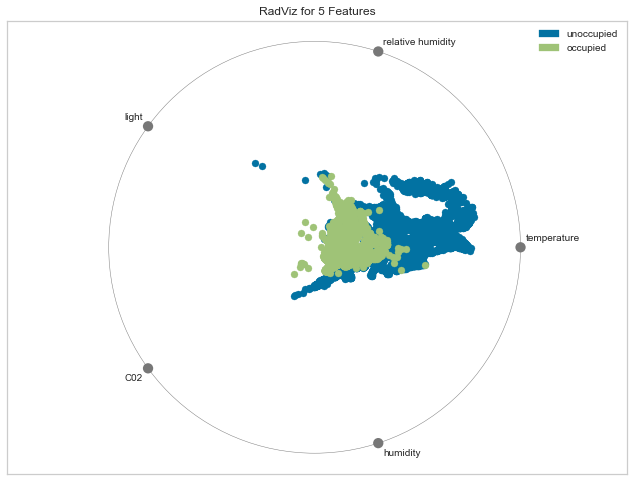

<AxesSubplot:title={'center':'RadViz for 5 Features'}>

In [10]:
# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(800, 600))

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

### Task 6: Feature Analysis - Parallel Coordinates Plot
***
In a Parallel Coordinates Plot, each variable is given its own axis and all the axes are placed in parallel to each other. Each axis can have a different scale, as each variable works off a different unit of measurement, or all the axes can be normalised to keep all the scales uniform. Values are plotted as a series of lines that connected across all the axes. This means that each line is a collection of points placed on each axis, that have all been connected together.

The order the axes are arranged in can impact the way how the reader understands the data. One reason for this is that the relationships between adjacent variables are easier to perceive, then for non-adjacent variables. So re-ordering the axes can help in discovering patterns or correlations across variables.

The downside to Parallel Coordinates Plots, is that they can become over-cluttered and therefore, illegible when they’re very data-dense. The best way to remedy this problem is through interactivity and a technique known as “Brushing”. Brushing highlights a selected line or collection of lines while fading out all the others. This allows you to isolate sections of the plot you’re interested in while filtering out the noise.
***

In [11]:
from yellowbrick.features.pcoords import ParallelCoordinates

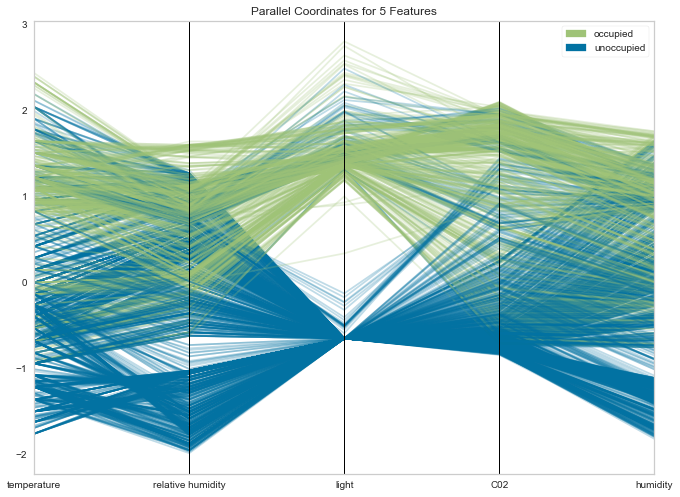

<AxesSubplot:title={'center':'Parallel Coordinates for 5 Features'}>

In [12]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, 
    features=features, 
    normalize='standard', 
    sample = 0.1,
    size=(800, 600)
)

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

### Task 7: Feature Analysis - Rank Features
***
Covariance Ranking Algorithm attempts to compute the mean value of the product of deviations of variates from their respective means. Covariance loosely attempts to detect a colinear relationship between features.
***

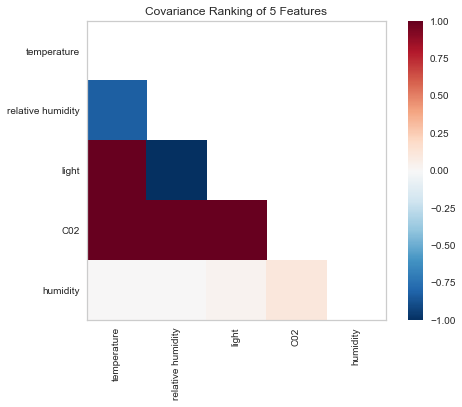

<AxesSubplot:title={'center':'Covariance Ranking of 5 Features'}>

In [13]:
# Instantiate the visualizer with the Covariance ranking algorithm
from yellowbrick.features.rankd import Rank2D
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data


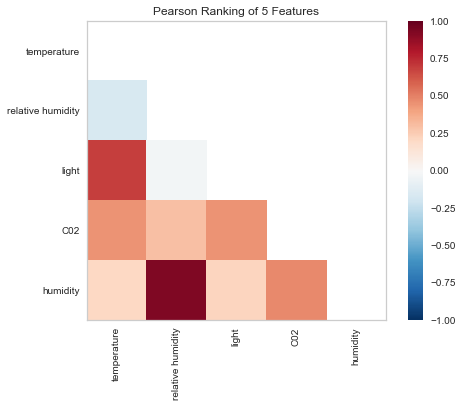

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [14]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data


### Task 8: Feature Analysis - Manifold Visualization
***
Manifold Visualization provides high dimensional visualization using manifold learning to embed instances described by many dimensions into 2, thus allowing the creation of a scatter plot that shows latent structures in data. Unlike decomposition methods such as PCA and SVD, manifolds generally use nearest-neighbors approaches to embedding, allowing them to capture non-linear structures that would be otherwise lost. The projections that are produced can then be analyzed for noise or separability to determine if it is possible to create a decision space in the data.
***

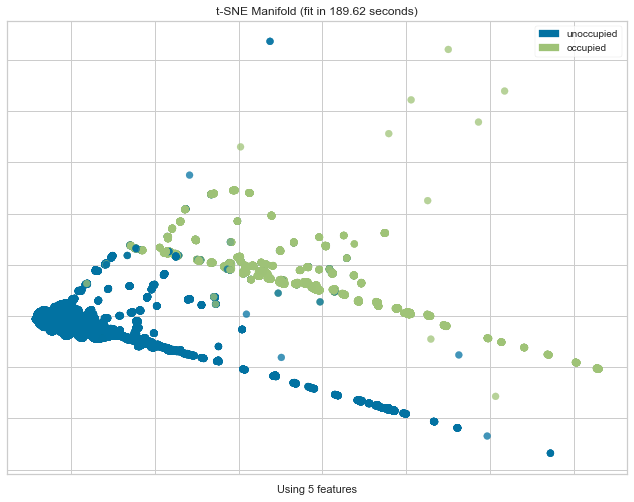

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 189.62 seconds)'}, xlabel='Using 5 features'>

In [15]:
from yellowbrick.features.manifold import Manifold

visualizer = Manifold(manifold='tsne', target='discrete', classes=classes, size=(800, 600))
visualizer.fit_transform(X,y)
visualizer.poof()


<h2 align=center> Model Selection and Evaluation </h2>

1. Choose a `model family` that best captures the relationship between the variables of interest.
2. Define a `model form` that specifies exactly how features interact to make a prediction.
3. Train a `fitted model` by optimizing internal parameters to the data.

### Task 9: ROC/AUC Plots
***
ROCAUC (Receiver Operating Characteristic/Area Under the Curve) plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the 'signal' from the 'noise'.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.
***

In [16]:
# Create the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

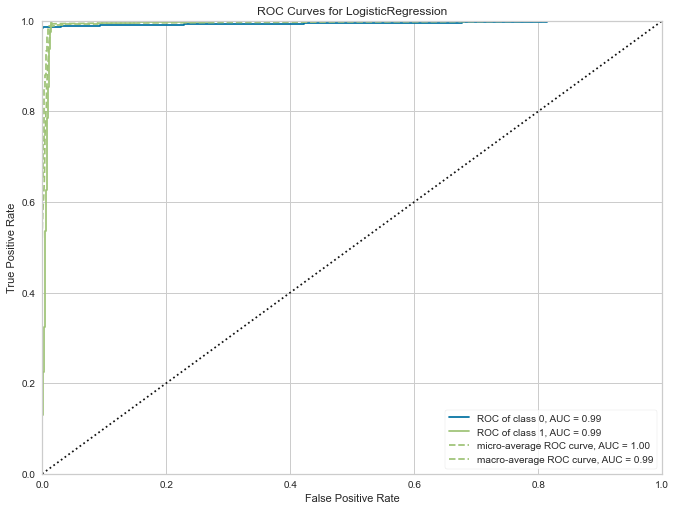

In [17]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# Instantiate the classification model and visualizer
visualizer = ROCAUC(LogisticRegression(), size=(800, 600))

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
# Draw/show/poof the data
g = visualizer.poof()    

### Task 10: Classification Report and Confusion Matrix
***
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).


The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

***

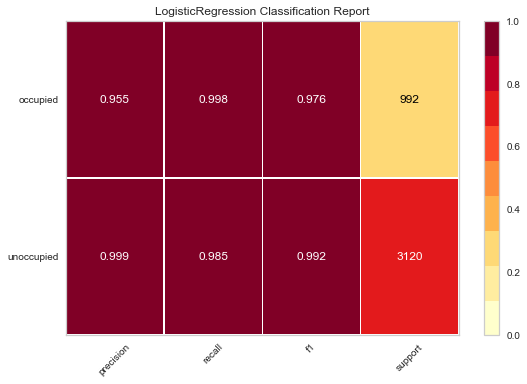

In [18]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(LogisticRegression(), classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

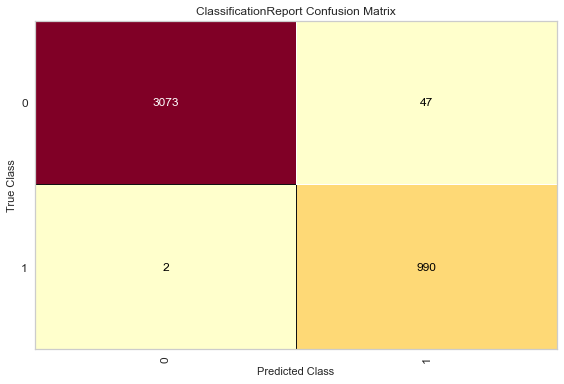

<AxesSubplot:title={'center':'ClassificationReport Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
from yellowbrick.classifier import ConfusionMatrix

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(visualizer, classes=[0,1])

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

### Task 11: Cross Validation Scores
***
Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.
***

In [20]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

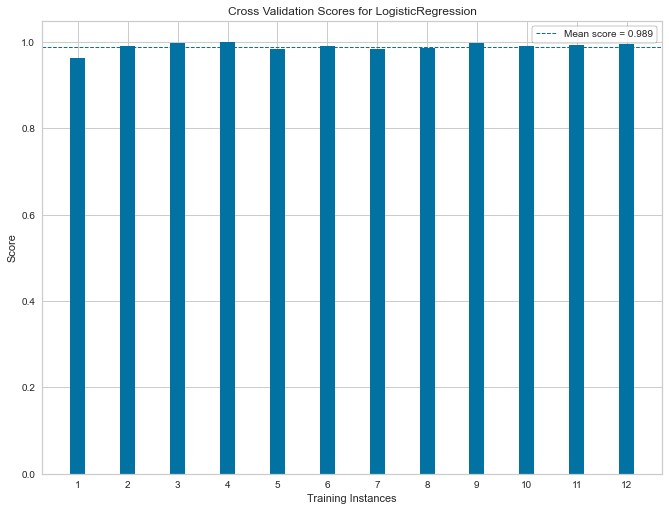

<AxesSubplot:title={'center':'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [21]:
# Create a new figure and axes
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(12)

# Create the CV score visualizer
oz = CVScores(
    LogisticRegression(), ax=ax, cv=cv, 
    scoring='f1_weighted', size=(800,600)
)

oz.fit(X, y)
oz.poof()

### Task 12: Evaluating Class Balance



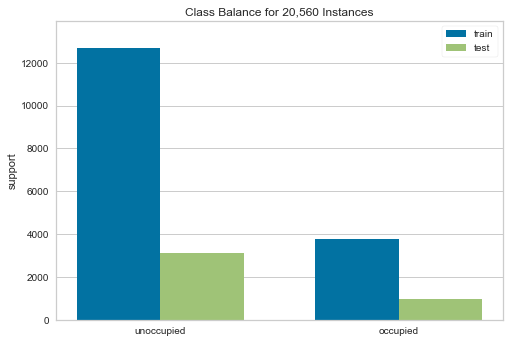

<AxesSubplot:title={'center':'Class Balance for 20,560 Instances'}, ylabel='support'>

In [22]:
from yellowbrick.classifier import ClassBalance

# Instantiate the classification model and visualizer
visualizer = ClassBalance(labels=classes)

visualizer.fit(y_train, y_test)
visualizer.poof()

### Task 13: Discrimination Threshold for Logistic Regression
***
A visualization of precision, recall, f1 score, and queue rate with respect to the discrimination threshold of a binary classifier. The discrimination threshold is the probability or score at which the positive class is chosen over the negative class. Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.

***

In [23]:
from yellowbrick.classifier import DiscriminationThreshold

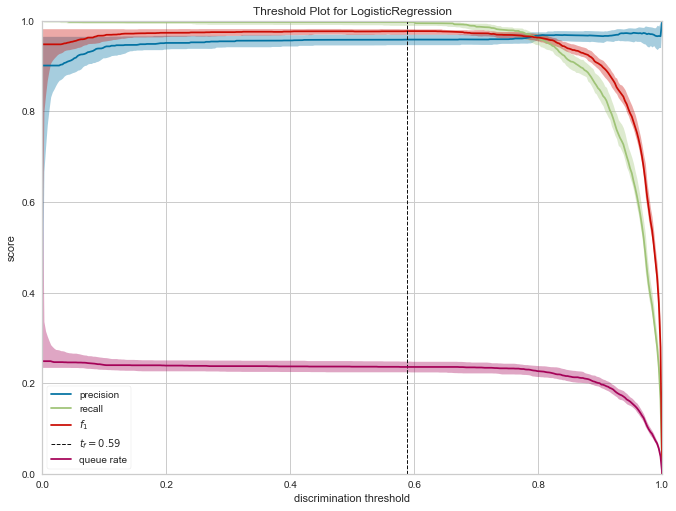

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [24]:
visualizer = DiscriminationThreshold(LogisticRegression(),size = (800,600) )
visualizer.fit(X_train, y_train)
visualizer.poof()